Gaussian Blur with FFT 
-------------

Christopher Tripp | Mar 2018

In [1]:
# python 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
%matplotlib inline

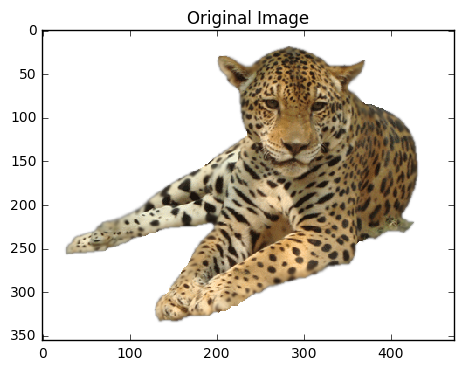

In [2]:
# get the figure
img = plt.imread("leopard.png")
plt.imshow(img, interpolation='nearest')
plt.title('Original Image')
plt.show()

A Gaussian blur can be performed via a convolution of the original image with a Gaussian curve.  However, the convolution theorem says that the convolution of two functions is equal to the product of their individual Fourier transforms.  And since the FFT is computationally quicker than a convolution, we can obtain the convolution of the image and a Gaussian curve more quickly by taking the FFT of each, multiplying them together, and inverse FFT the product.

In [3]:
#define a 1D Gaussian with width parameter 'a'
x = np.linspace(-10, 10, 20)
a = 0.3
gaussian = np.exp(-(x**2)/2*(a**2))
gaussian /= np.trapz(gaussian) # normalize the integral to 1

#turn the 1D gaussian into a 2D kernel
kernel = gaussian[np.newaxis,:] * gaussian[:,np.newaxis]

#get an FFT of the kernel, with the same shape (height and width) as the original image
kernel_fft = np.fft.fft2(kernel, s=img.shape[0:2], axes=(0, 1))
#add a 3rd dimension so that we can do all three colors (RGB) in one pass.
kernel_fft = kernel_fft[:,:,np.newaxis]

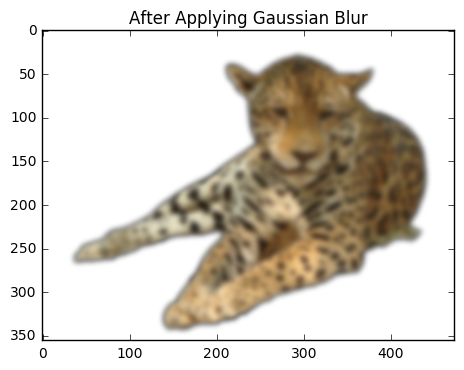

In [4]:
#get an FFT of the original image
img_fft = np.fft.fft2(img, axes=(0,1))

#multiply the two FFTs and inverse FFT the product
new_img_product = kernel_fft * img_fft
new_img = np.fft.ifft2(new_img_product,axes=(0, 1)).real

#show the new blurred image
plt.imshow(new_img)
plt.title('After Applying Gaussian Blur')
plt.show()

Citations:
I got help fixing some problems with my Gaussian kernel from here: http://www.scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_image_blur.html